In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
import warnings
warnings.filterwarnings("ignore")

In [39]:
main_df = pd.read_csv("../dataset/cleaned_cm_top5.csv")
df = pd.read_csv("../dataset/final.csv")
X_scaled = df.values

In [30]:
pca = PCA(n_components=20, random_state=42)
X_pca = pca.fit_transform(X_scaled)
X_p_sub = X_pca[:, 1:10]

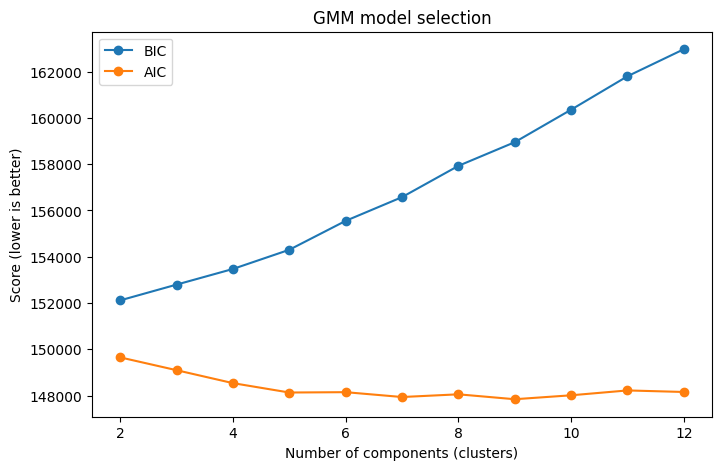

Best number of clusters by BIC: 2


In [31]:
X_model = X_pca

ks = range(2, 13)
bics = []
aics = []

for k in ks:
    gmm_k = GaussianMixture(
        n_components=k,
        covariance_type='full',
        random_state=42,
        n_init=5
    )
    gmm_k.fit(X_model)
    bics.append(gmm_k.bic(X_model))
    aics.append(gmm_k.aic(X_model))

# Plot BIC/AIC to see the elbow
plt.figure(figsize=(8, 5))
plt.plot(ks, bics, marker='o', label='BIC')
plt.plot(ks, aics, marker='o', label='AIC')
plt.xlabel("Number of components (clusters)")
plt.ylabel("Score (lower is better)")
plt.title("GMM model selection")
plt.legend()
plt.show()

# Choose best k by minimum BIC
best_k = ks[int(np.argmin(bics))]
print("Best number of clusters by BIC:", best_k)

best_gmm = GaussianMixture(
    n_components=best_k,
    covariance_type='full',
    random_state=42,
    n_init=5
)
best_labels = best_gmm.fit_predict(X_model)
df['gmm_cluster'] = best_labels

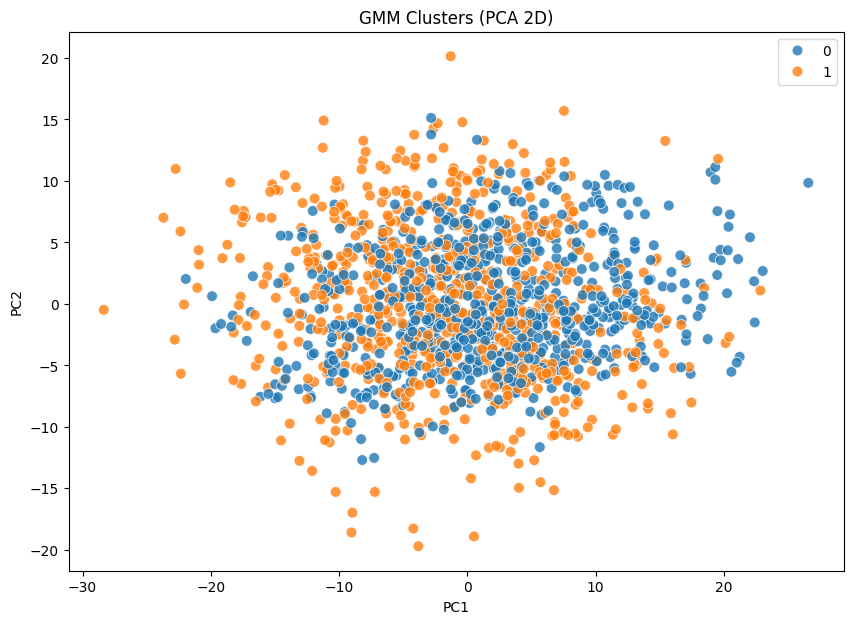

In [32]:
plot_df = pd.DataFrame({
    'PC1': X_p_sub[:, 0],
    'PC2': X_p_sub[:, 1],
    'cluster': df['gmm_cluster']
})

plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=plot_df,
    x='PC1',
    y='PC2',
    hue='cluster',
    palette='tab10',
    s=60,
    alpha=0.8
)
plt.title("GMM Clusters (PCA 2D)")
plt.legend()
plt.show()

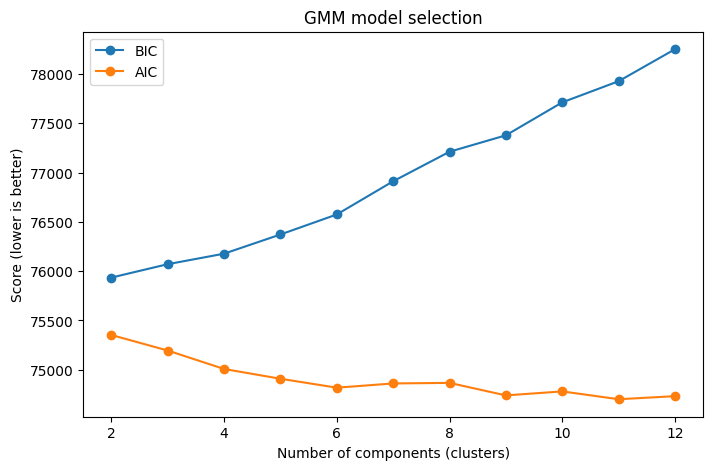

Best number of clusters by BIC: 2


In [33]:
X_model = X_p_sub

ks = range(2, 13)
bics = []
aics = []

for k in ks:
    gmm_k = GaussianMixture(
        n_components=k,
        covariance_type='full',
        random_state=42,
        n_init=5
    )
    gmm_k.fit(X_model)
    bics.append(gmm_k.bic(X_model))
    aics.append(gmm_k.aic(X_model))

# Plot BIC/AIC to see the elbow
plt.figure(figsize=(8, 5))
plt.plot(ks, bics, marker='o', label='BIC')
plt.plot(ks, aics, marker='o', label='AIC')
plt.xlabel("Number of components (clusters)")
plt.ylabel("Score (lower is better)")
plt.title("GMM model selection")
plt.legend()
plt.show()

# Choose best k by minimum BIC
best_k = ks[int(np.argmin(bics))]
print("Best number of clusters by BIC:", best_k)

best_gmm = GaussianMixture(
    n_components=best_k,
    covariance_type='full',
    random_state=42,
    n_init=5
)
best_labels = best_gmm.fit_predict(X_model)
df['gmm_cluster'] = best_labels

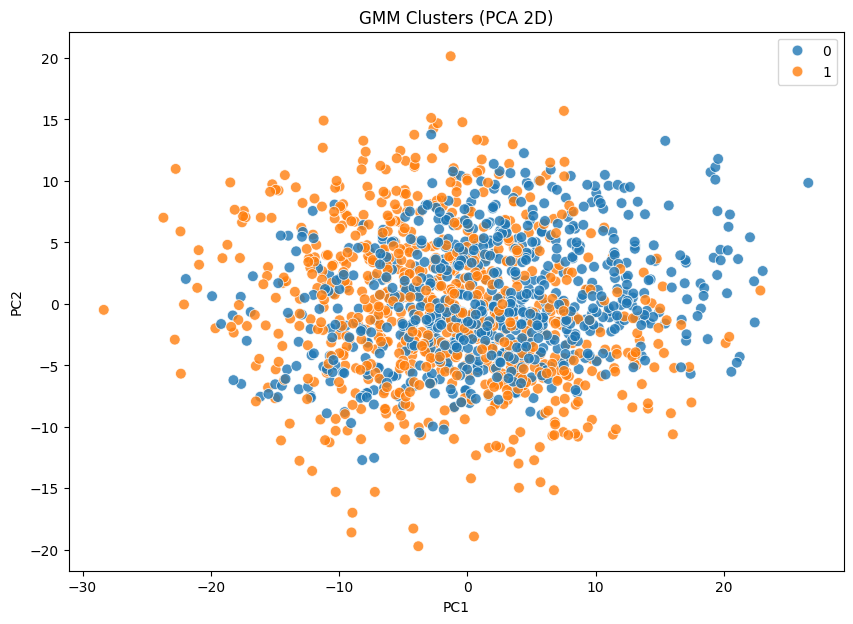

In [34]:
plot_df = pd.DataFrame({
    'PC1': X_p_sub[:, 0],
    'PC2': X_p_sub[:, 1],
    'cluster': df['gmm_cluster']
})

plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=plot_df,
    x='PC1',
    y='PC2',
    hue='cluster',
    palette='tab10',
    s=60,
    alpha=0.8
)
plt.title("GMM Clusters (PCA 2D)")
plt.legend()
plt.show()

In [35]:
gmm = GaussianMixture(
    n_components=7,
    covariance_type='full',
    random_state=42,
    n_init=10
)
labels = gmm.fit_predict(X_model)
df['gmm_cluster'] = labels

cluster_centroids = df.groupby('gmm_cluster').mean()
display(cluster_centroids.T)

gmm_cluster,0,1,2,3,4,5,6
Height,177.709877,177.828313,177.961538,185.000000,179.981735,176.748815,180.200692
Weight,67.141975,67.677711,70.711538,76.715909,72.000000,69.744076,68.771626
Age,17.345679,18.641566,23.660256,23.488636,23.730594,20.554502,18.636678
Acc,9.580247,11.512048,12.102564,11.261364,12.735160,12.199052,12.429066
Agg,11.580247,10.557229,10.461538,11.738636,13.730594,10.483412,10.425606
Agi,9.376543,11.307229,12.717949,10.994318,12.561644,12.218009,11.743945
Ant,8.901235,7.563253,11.730769,12.000000,12.470320,11.246445,7.923875
Bal,9.444444,7.054217,11.435897,11.875000,12.319635,11.402844,8.006920
Bra,8.067901,7.054217,10.198718,11.727273,12.986301,10.578199,6.993080
Cmp,9.043210,7.289157,11.987179,11.710227,11.931507,11.251185,7.923875


In [36]:
sil = silhouette_score(X_model, labels)
print("Silhouette:", sil)

Silhouette: -0.009207778753804567


In [37]:
df["gmm_cluster"].value_counts()

gmm_cluster
1    332
6    289
4    219
5    211
3    176
0    162
2    156
Name: count, dtype: int64

In [41]:
probs = gmm.predict_proba(X_model)
main_df[[f'gmm_prob_{i}' for i in range(probs.shape[1])]] = probs
main_df.head()

,UID,Inf,Name,DoB,Nat,Division,Club,Based,Preferred_Foot,Right_Foot,...,Thr,Vis,Wor,gmm_prob_0,gmm_prob_1,gmm_prob_2,gmm_prob_3,gmm_prob_4,gmm_prob_5,gmm_prob_6
0,92039023,NaN,Joshua Kimmich,8/2/1995 (27 years old),GER,Bundesliga,FC Bayern,Germany (Bundesliga),Right,Very Strong,...,1,18,19,0.000378,4.542314e-02,8.725929e-01,1.026646e-02,0.055210,6.703249e-07,0.016129
1,91104807,Inj,Leon Goretzka,6/2/1995 (27 years old),GER,Bundesliga,FC Bayern,Germany (Bundesliga),Right,Very Strong,...,1,15,18,0.002496,2.449544e-07,2.572043e-05,2.035856e-01,0.787203,5.042487e-03,0.001647
2,28124579,NaN,Jamal Musiala,26/2/2003 (19 years old),GER,Bundesliga,FC Bayern,Germany (Bundesliga),Right,Very Strong,...,1,15,15,0.000580,1.744803e-18,5.547676e-08,1.515294e-05,0.969274,2.928960e-02,0.000841
3,29232937,NaN,Jude Bellingham,29/6/2003 (18 years old),ENG,Bundesliga,Borussia Dortmund,Germany (Bundesliga),Right,Very Strong,...,3,13,17,0.027666,8.253033e-09,8.470503e-05,2.668300e-02,0.823344,3.339145e-03,0.118884
4,24004434,NaN,Andrej Kramarić,19/6/1991 (31 years old),CRO,Bundesliga,Hoffenheim,Germany (Bundesliga),Either,Very Strong,...,2,15,15,0.000003,8.916601e-13,9.999679e-01,8.401746e-08,0.000024,1.457713e-06,0.000004


In [42]:
prob_cols = [f"gmm_prob_{i}" for i in range(7)]  # 7 clusters
probs = main_df[prob_cols].to_numpy()

# Hard cluster = index of max probability
main_df["gmm_cluster"] = probs.argmax(axis=1)
main_df.head()

,UID,Inf,Name,DoB,Nat,Division,Club,Based,Preferred_Foot,Right_Foot,...,Vis,Wor,gmm_prob_0,gmm_prob_1,gmm_prob_2,gmm_prob_3,gmm_prob_4,gmm_prob_5,gmm_prob_6,gmm_cluster
0,92039023,NaN,Joshua Kimmich,8/2/1995 (27 years old),GER,Bundesliga,FC Bayern,Germany (Bundesliga),Right,Very Strong,...,18,19,0.000378,4.542314e-02,8.725929e-01,1.026646e-02,0.055210,6.703249e-07,0.016129,2
1,91104807,Inj,Leon Goretzka,6/2/1995 (27 years old),GER,Bundesliga,FC Bayern,Germany (Bundesliga),Right,Very Strong,...,15,18,0.002496,2.449544e-07,2.572043e-05,2.035856e-01,0.787203,5.042487e-03,0.001647,4
2,28124579,NaN,Jamal Musiala,26/2/2003 (19 years old),GER,Bundesliga,FC Bayern,Germany (Bundesliga),Right,Very Strong,...,15,15,0.000580,1.744803e-18,5.547676e-08,1.515294e-05,0.969274,2.928960e-02,0.000841,4
3,29232937,NaN,Jude Bellingham,29/6/2003 (18 years old),ENG,Bundesliga,Borussia Dortmund,Germany (Bundesliga),Right,Very Strong,...,13,17,0.027666,8.253033e-09,8.470503e-05,2.668300e-02,0.823344,3.339145e-03,0.118884,4
4,24004434,NaN,Andrej Kramarić,19/6/1991 (31 years old),CRO,Bundesliga,Hoffenheim,Germany (Bundesliga),Either,Very Strong,...,15,15,0.000003,8.916601e-13,9.999679e-01,8.401746e-08,0.000024,1.457713e-06,0.000004,2


In [43]:
main_df.to_csv("../dataset/final_with_gmm.csv", index=False)